##Regressão logística
##Importando libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score, confusion_matrix, auc

##Montando disco

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


##Carregando a base TITANIC treinamento
##https://www.kaggle.com/c/titanic/data

In [4]:
titanic = pd.read_csv('/content/drive/My Drive/Inteligência Artificial/UA 10/aula 19/titanic_train.csv', sep=',')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Preparando e analisando os dados

In [5]:
#Plotando dados da frequencia
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3) #Arredonde um número em 3 casas decimais
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual}) #Criando dataframe
    if plot: 
        sns.countplot(x)
        plt.show() #Plotando
    return res

# Quantos sobreviveram e não sobreviveram

In [ ]:
print((titanic.Survived.value_counts() / titanic.shape[0]) * 100)

#Plotando dados da frequencia
freq(titanic.Survived, plot=True)

##Dados da idade

In [8]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##Plotando dados

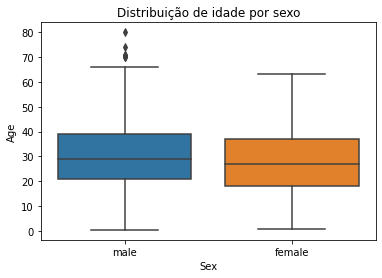

In [9]:
sns.boxplot(x='Sex', y='Age', data=titanic)
plt.title('Distribuição de idade por sexo')
plt.show()

##Modelagem de dados para a regressão
##Regressão logística para investigar as chances de sobrevivência das pessoas dados 3 preditores:

- a idade da pessoa;
- a classe em que a pessoa viajava e
- o sexo da pessoa.

In [10]:
# Transforma classe em categorico
titanic['Pclass'] = titanic['Pclass'].astype('category')

#Criando modelo e treinando

In [11]:
modelo = smf.glm(formula='Survived ~ Age + Pclass + Sex', data=titanic, family = sm.families.Binomial()).fit()

#Função para verificar todas as métricas do modelo
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Fri, 30 Oct 2020   Deviance:                       647.28
Time:                        17:52:49   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7770      0.401      9.416      